# Module 2 Spatial Operations

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Create Polygon

In [ ]:
belgium

## Create Point

In [ ]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

In [ ]:
paris

In [ ]:
brussels

## Create Line

In [ ]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

In [ ]:
line

In [ ]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [ ]:
brussels.within(belgium)

In [ ]:
belgium.contains(brussels)

In [ ]:
paris.within(belgium)

In [ ]:
belgium.contains(line)

In [ ]:
line.intersects(belgium)

## Spatial relationships with GeoDataFrames

In [ ]:
countries[countries.contains(paris)]

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [ ]:
countries[countries.crosses(amazon)]  # or .intersects

In [ ]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

In [ ]:
brussels.buffer(1).intersection(belgium)

In [ ]:
brussels.buffer(1).union(belgium)

In [ ]:
brussels.buffer(1).difference(belgium)

In [ ]:
brussels.difference(belgium)

## Unary Union

In [ ]:
africa_countries = countries[countries['continent'] == 'Africa']

In [ ]:
africa = africa_countries.unary_union

In [ ]:
africa

## Recap of Pandas DataFrame Join

In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

In [ ]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

### Inner and Outer Joins

In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

In [ ]:
pd.merge(df_a, df_b, on='subject_id')

In [ ]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [ ]:
cities2

In [ ]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

In [ ]:
cities2.merge(countries2, on='iso_a3')

## Spatial Join

In [ ]:
joined = geopandas.sjoin(cities, countries, op='within', how='left')

In [ ]:
joined

In [ ]:
joined['continent'].value_counts()

## Overlay Spatial Operatoins

In [ ]:
africa = countries[countries['continent'] == 'Africa']

In [ ]:
africa.plot()

In [ ]:
cities['geometry'] = cities.buffer(2)

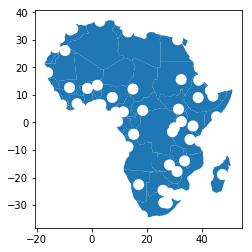

In [56]:
geopandas.overlay(africa, cities, how='difference').plot()